# **Sujet 5 : Vitesse (débit) et pression d'un écoulement de fluide à travers une surface**

On considère l'écoulement d'un fluide dont le champ de vitesse est donné par :

$
\overrightarrow{V} (r, \theta , z) = \left( \begin{array}{c} kr \\ z \cos ( \theta ) \\ V_0 ( 1 - \frac{r^2}{R^2}) \end{array} \right)
$
où $k$, $R$ sont des constantes réelles et $V_0$ la vitesse axiale.

Quel est le débit volumique à travers une section perpendiculaire à l'axe longitudinal d'un cylindre de rayon $R$ et de hauteur $h$ ?

L'axe longitudinal du cylindre coïncide avec l'axe $Oz$ du repère.

Dans ce même écoulement, le champ de pression $p$ est défini par :

$
p(x,y) = \frac{xy}{x^2 + y^2}
$.

Calculer la pression moyenne dans une section droite perpendiculaire à l'axe longitudinal du cylindre.

Indications :

Formule du débit volumique moyen $Q_v$ à travers une surface $S : Q_v = \iint_S \overrightarrow{V}.\overrightarrow{n}dS$ où $\overrightarrow{n}$ est un vecteur unitaire normale à $S$.

La valeur moyenne $F_{moy}$ d'un champ scalaire $F(x,y)$ sur un domaine $D$ est donnée par : $F_{moy} = \frac{\iint_D F(x,y)dxdy}{\iint_D 1dxdy}$.

**Démarche et raisonnement attendues :**
* Faire apparaitre d'éventuelles symétries du champ de vitesse et/ou du champ de pression
* Calculer le débit et la pression moyenne à travers les surfaces du cylindre
* En déduire le débit total
* Approches analytique et numérique (conjecturer les résultats numériques par solveur ou en appliquant une méthode intégrale approchée)

# Résolution

#### Représentation du cylindre

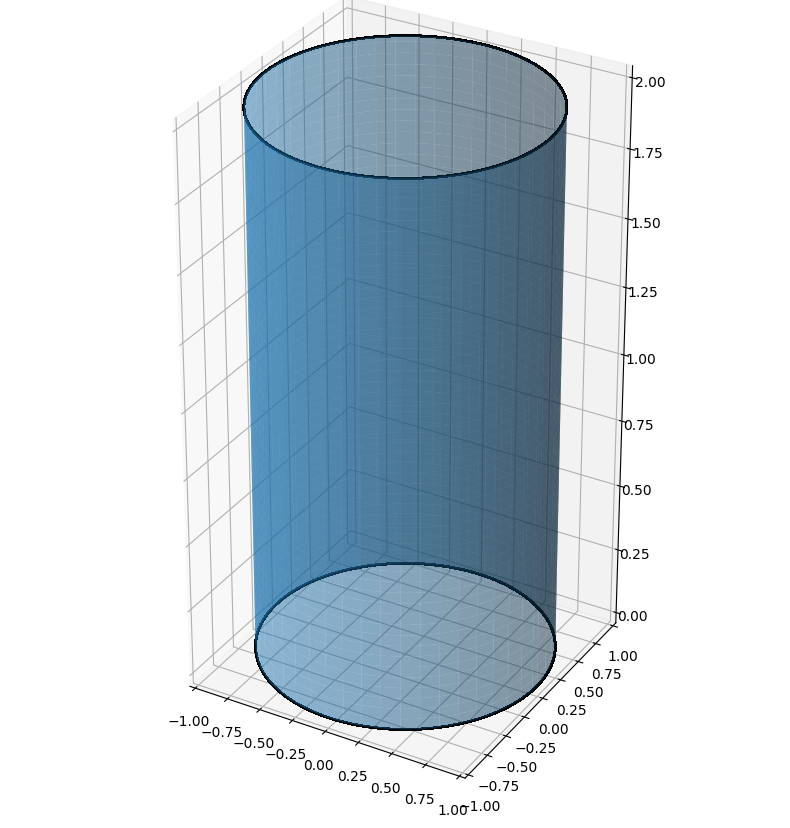

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres du cylindre
r = 1    # rayon
h = 2    # hauteur
N = 100  # nombre de points pour le tracé

# Générer les coordonnées x, y, z du cylindre
theta = np.linspace(0, 2*np.pi, N)
z = np.linspace(0, h, N)
theta, z = np.meshgrid(theta, z)
x = r * np.cos(theta)
y = r * np.sin(theta)

# Créer la figure et l'axe 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface latérale du cylindre
ax.plot_surface(x, y, z, alpha=0.5)

# Ajouter les cercles de base
ax.plot(np.ravel(x), np.ravel(y), np.zeros_like(np.ravel(x)), color='black')
ax.plot(np.ravel(x), np.ravel(y), np.ones_like(np.ravel(x)) * h, color='black')

# Paramétrer les limites de l'axe et l'aspect du graphique
ax.set_xlim(-r, r)
ax.set_ylim(-r, r)
ax.set_zlim(0, h)
ax.set_box_aspect([1,1,2])  # aspect ratio du cylindre

fig.set_size_inches(10, 10)  # taille du graphique

# Afficher le graphique
plt.show()


## Calcul du débit volumique moyen

### Pour une surface $S$ perpendiculaire à l'axe longitudinal du cylindre

On considère la surface $S$ perpendiculaire à l'axe longitudinal du cylindre de rayon $R$ et de hauteur $h$.
Puisque $\overrightarrow{V}$ est dépend de $\cos(\theta)$. Et comme $\cos(\theta) = \cos(-\theta)$, on peut déduire que $\overrightarrow{V}$ est symétrique par rapport à l'axe $Ox$. On peut donc calculer le début volumique moyen à travers la moitié de la surface $S$.

$\overrightarrow{n}$ est un vecteur unitaire normale à $S$ donc $\overrightarrow{n} = \left( \begin{array}{c} 0 \\ 0 \\ 1 \end{array} \right)$.

On peut donc calculer le débit volumique moyen à travers la surface $S$ par la formule suivante :

$\begin{aligned}
Q_v(S) &= \iint_S \overrightarrow{V}.\overrightarrow{n}dS \\
&= 2 \int_0^\pi \left( \int_0^R \overrightarrow{V}.\overrightarrow{n}\ d\theta \right)\ rdr \\
&= 2 \int_0^\pi \left( \int_0^R kr \times 0 + z \cos(\theta) \times 0 + V_0 (1 - \frac{r^2}{R^2})\ d\theta \right)\ rdr \\
&= 2 \int_0^\pi \left( \int_0^R V_0 (1 - \frac{r^2}{R^2})\ d\theta \right)\ rdr \\
&= 2 \pi \int_0^R \left(V_0 (1 - \frac{r^2}{R^2}) \right) rdr \\
&= 2 \pi V_0 \int_0^R \left(1 - \frac{r^2}{R^2} \right) rdr \\
&= 2 \pi V_0 \int_0^R \left( r - \frac{r^3}{R^2} \right) dr \\
&= 2 \pi V_0 \left[ \frac{1}{2}r^2 - \frac{1}{4} \frac{r^4}{R^2} \right]_0^R \\
&= 2 \pi V_0 \left( \frac{1}{2} R^2 - \frac{1}{4} R^2 \right) \\
&= \frac{1}{2} \pi V_0 R^2
\end{aligned}$

## Calcul de la pression moyenne

La pression est calculée par la formule suivante :
$p(x,y) = \frac{xy}{x^2 + y^2}$

Donc le signe est donné par $x$ et $y$ donc la pression est symétrique par rapport au point $O$. Soit comme illustré dans le schéma suivant représentant la surface $S$ :

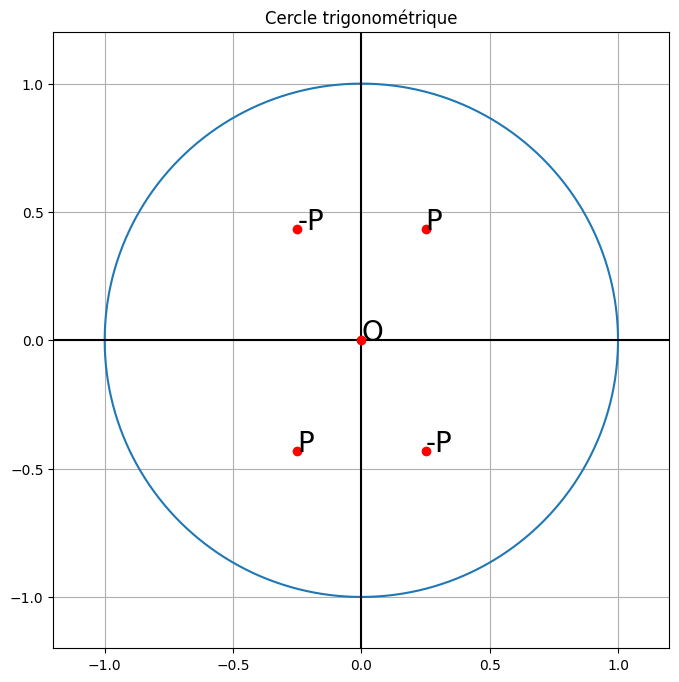

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Définir les angles en radians
angles = np.linspace(0, 2*np.pi, 1000)

# Calculer les coordonnées x et y des points du cercle
x = np.cos(angles)
y = np.sin(angles)

# Tracer le cercle trigonométrique
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect('equal')
ax.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.title('Cercle trigonométrique')
# Ajout de points en coordonnées polaires
r = 0.5
theta = np.pi/3
x = r*np.cos(theta)
y = r*np.sin(theta)
ax.plot(x, y, 'ro')
ax.plot(x, -y, 'ro')
ax.plot(-x, y, 'ro')
ax.plot(-x, -y, 'ro')
ax.plot(0, 0, 'ro')
# Ajout nom des points
ax.text(x, y, 'P', fontsize=20)
ax.text(x, -y, '-P', fontsize=20)
ax.text(-x, y, '-P', fontsize=20)
ax.text(-x, -y, 'P', fontsize=20)
ax.text(0, 0, 'O', fontsize=20)
# Changer la taille de la figure
fig.set_size_inches(8, 8)
plt.show()

La pression moyenne est donc $F_{moy} = 0$

## Calcul du débit total

Pour le débit total, il suffit d'intégrer le débit volumique moyen sur la hauteur $h$. Soit :

$\begin{aligned}
Q_v(total) &= \int_0^h Q_v(S)\ dh \\[10pt]
&= \int_0^h \left( \frac{1}{2} \pi V_0 R^2 \right) dh \\[10pt]
&= h \frac{1}{2} \pi V_0 R^2 \\[10pt]
\end{aligned}$